In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv")
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [3]:
#check for unusable data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [4]:
#See the unique values
print(df['Location'].unique())
print(df['Condition'].unique())

['Downtown' 'Suburban' 'Urban' 'Rural']
['Excellent' 'Good' 'Fair' 'Poor']


In [5]:
#map the values into a numerical representation viable for the model
location_map = {
    "Downtown": 1,
    "Suburban": 2,
    "Urban": 3,
    "Rural": 4
}
condition_map = {
    "Poor": 0,
    "Fair": 1,
    "Good": 2,
    "Excellent": 3
}
garage_map = {
    "Yes": 1,
    "No": 0
}
df['Location'] = df['Location'].map(location_map)
df['Condition'] = df['Condition'].map(condition_map)
df['Garage'] = df['Garage'].map(garage_map)

In [6]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,2.437500,1.488000,0.481000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,1.130811,1.126273,0.499764,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,1.000000,0.000000,0.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,1.000000,0.000000,0.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,2.000000,1.000000,0.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,3.000000,3.000000,1.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,4.000000,3.000000,1.000000,999656.000000


<Axes: xlabel='Bedrooms', ylabel='count'>

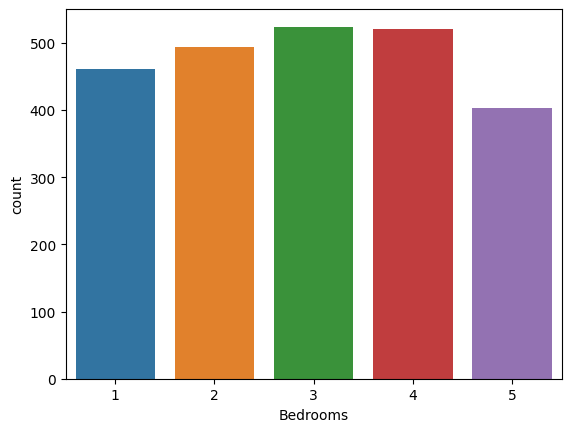

In [7]:
#Visualize the distribution
import seaborn as sns
sns.countplot(x=df['Bathrooms'])
sns.countplot(x=df['Bedrooms'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


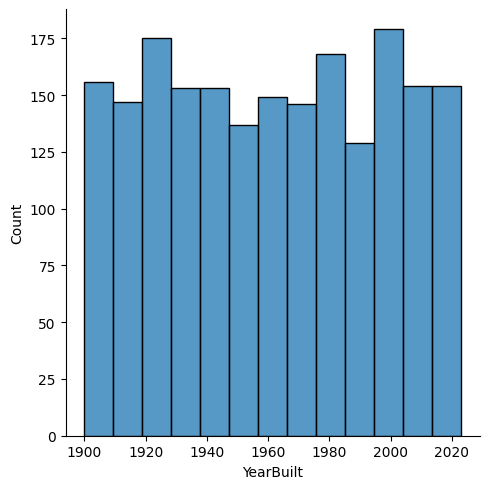

In [8]:
#Visualize distributions
sns.displot(df['YearBuilt'], kind = 'hist')

In [9]:
#create training, testing sets
from sklearn.model_selection import train_test_split
df = df.drop("Id", axis = 1)
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.head())
print(y_train.head())

      Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
739    724         3          2       2       1926         3          1   
1431  1134         2          4       3       1921         1          0   
512   2605         5          4       2       2015         1          3   
174   2294         4          4       2       1991         2          1   
476   1865         2          4       2       1930         1          2   

      Garage  
739        0  
1431       0  
512        0  
174        0  
476        1  
739     111086
1431    591465
512     752858
174     745169
476     255719
Name: Price, dtype: int64


In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [11]:
param_grid = [{
    'n_estimators': [500, 1000],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [10, 20, 30]
}]

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
grid_search = GridSearchCV(rf, 
                           param_grid, 
                           cv = 2,
                           scoring = 'neg_mean_absolute_percentage_error',
                           n_jobs = -1
)

In [14]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_depth': [10, 20, 30],
                          'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [5, 10, 15],
                          'n_estimators': [500, 1000]}],
             scoring='neg_mean_absolute_percentage_error')

In [15]:
grid_search.best_score_ * -1

0.9320539551208311

In [16]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 500}